In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import os, shutil

In [3]:
base_dir = '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct'

In [4]:
# train, validation, test로 dataset을 나눔..

In [5]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
train_dir

'/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/train'

In [7]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [9]:
train_defect_dir = os.path.join(train_dir, 'defect')
train_nondefect_dir = os.path.join(train_dir, 'non-defect')

test_defect_dir = os.path.join(test_dir, 'defect')
test_nondefect_dir = os.path.join(test_dir, 'non-defect')

validation_defect_dir = os.path.join(validation_dir, 'defect')
validation_nondefect_dir = os.path.join(validation_dir, 'non-defect')

In [10]:
os.mkdir(train_defect_dir)
os.mkdir(train_nondefect_dir)

os.mkdir(test_defect_dir)
os.mkdir(test_nondefect_dir)

os.mkdir(validation_defect_dir)
os.mkdir(validation_nondefect_dir)

In [11]:
defect_files = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/defect')
nondefect_files = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/nondefect')


In [12]:
defect_files[:5]

['cast_def_0_5634.jpeg',
 'cast_def_0_3252.jpeg',
 'cast_def_0_9562.jpeg',
 'cast_def_0_5147.jpeg',
 'cast_def_0_1334.jpeg']

In [13]:
nondefect_files[:5]

['cast_ok_0_9760.jpeg',
 'cast_ok_0_1303.jpeg',
 'cast_ok_0_9086.jpeg',
 'cast_ok_0_3430.jpeg',
 'cast_ok_0_7583.jpeg']

In [14]:
len(defect_files)

4211

In [15]:
len(nondefect_files)

3137

In [18]:
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt

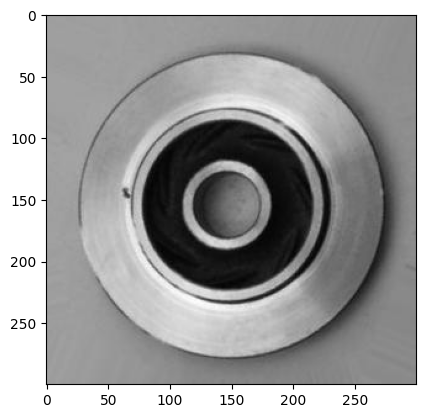

In [19]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/defect/cast_def_0_5634.jpeg')
img_arr = np.array(img)
plt.imshow(img_arr)

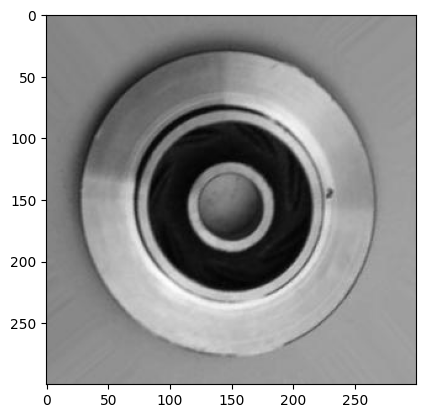

In [22]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/defect/cast_def_0_3252.jpeg')
img_arr = np.array(img)
plt.imshow(img_arr)

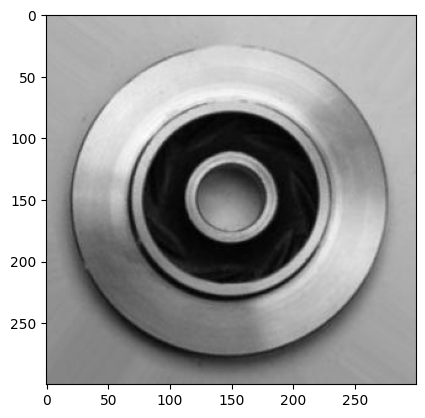

In [21]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/nondefect/cast_ok_0_9760.jpeg')
img_arr = np.array(img)
plt.imshow(img_arr)

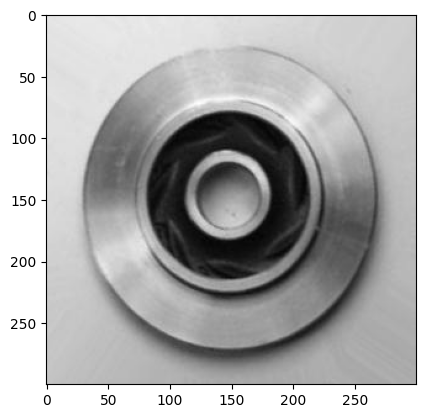

In [23]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/nondefect/cast_ok_0_1303.jpeg')
img_arr = np.array(img)
plt.imshow(img_arr)

In [ ]:
# 이미지를 복사해서 train, validation, test folde에 저장

In [25]:
for f in defect_files[:1000]:
  src = os.path.join(base_dir, 'defect', f)  # 불량제품 이미지 경로
  dst = os.path.join(train_defect_dir, f)

  shutil.copyfile(src, dst)

In [26]:
for f in defect_files[1000:1500]:
  src = os.path.join(base_dir, 'defect', f)  # 불량제품 이미지 경로
  dst = os.path.join(validation_defect_dir, f)

  shutil.copyfile(src, dst)

In [27]:
for f in defect_files[1500:500]:
  src = os.path.join(base_dir, 'defect', f)  # 불량제품 이미지 경로
  dst = os.path.join(test_defect_dir, f)

  shutil.copyfile(src, dst)

In [28]:
for f in nondefect_files[:1000]:
  src = os.path.join(base_dir, 'nondefect', f)  # 불량제품 이미지 경로
  dst = os.path.join(train_nondefect_dir, f)

  shutil.copyfile(src, dst)

for f in nondefect_files[1000:1500]:
  src = os.path.join(base_dir, 'nondefect', f)  # 불량제품 이미지 경로
  dst = os.path.join(validation_nondefect_dir, f)

  shutil.copyfile(src, dst)

for f in nondefect_files[1500:2000]:
  src = os.path.join(base_dir, 'nondefect', f)  # 불량제품 이미지 경로
  dst = os.path.join(test_nondefect_dir, f)

  shutil.copyfile(src, dst)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import Sequential

In [31]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 128)       0

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [30]:
train_dir

'/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/castproduct/train'

In [35]:
train_data_importer = train_datagen.flow_from_directory(train_dir, target_size=(300,300), batch_size=20, class_mode='binary')
test_data_importer = test_datagen.flow_from_directory(test_dir, target_size=(300,300), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model.fit(train_data_importer,
          epochs=50,
          validation_data=test_data_importer)

Epoch 1/50
100/100 [==============================] - 27s 143ms/step - loss: 0.6722 - accuracy: 0.6015 - val_loss: 0.7495 - val_accuracy: 0.4900
Epoch 2/50
100/100 [==============================] - 14s 140ms/step - loss: 0.4367 - accuracy: 0.7850 - val_loss: 0.1168 - val_accuracy: 0.9720
Epoch 3/50
100/100 [==============================] - 15s 147ms/step - loss: 0.2552 - accuracy: 0.8935 - val_loss: 0.2435 - val_accuracy: 0.8820
Epoch 4/50
100/100 [==============================] - 15s 145ms/step - loss: 0.2615 - accuracy: 0.8935 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 5/50
100/100 [==============================] - 14s 141ms/step - loss: 0.1156 - accuracy: 0.9560 - val_loss: 0.1238 - val_accuracy: 0.9640
Epoch 6/50
100/100 [==============================] - 15s 144ms/step - loss: 0.1236 - accuracy: 0.9550 - val_loss: 0.1111 - val_accuracy: 0.9600
Epoch 7/50
100/100 [==============================] - 15s 151ms/step - loss: 0.0822 - accuracy: 0.9690 - val_loss: 0.1109 - val_ac

KeyboardInterrupt: 